In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [91]:
game_data = pd.read_csv('../source_data/game_data_all.csv', index_col="Unnamed: 0")

In [92]:
game_data

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date
0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25
1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25
2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31
3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28
4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),Strategy (2),Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01
67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),Strategy (2),Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01
67568,Gumboy: Crazy Adventures,/app/2520/,2006-12-19,22,61,60,121,50.32,Unknown Genre (0),"Casual (4), Indie (23)",CINEMAX s.r.o.,CINEMAX s.r.o.,SDK.OpenAL; SDK.Vorbis,2022-11-04,50.0,0,1,22,2008-09-13
67569,Shattered Union,/app/3960/,2006-10-25,13,71,70,141,50.27,Strategy (2),Strategy (2),2K,PopTop,SDK.Bink_Video; SDK.Miles_Sound_System,2019-09-20,50.0,1,2,13,2020-03-15


In [93]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67571 entries, 0 to 67570
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game                   67571 non-null  object 
 1   link                   67571 non-null  object 
 2   release                67571 non-null  object 
 3   peak_players           67571 non-null  int64  
 4   positive_reviews       67571 non-null  int64  
 5   negative_reviews       67571 non-null  int64  
 6   total_reviews          67571 non-null  int64  
 7   rating                 67571 non-null  float64
 8   primary_genre          67561 non-null  object 
 9   store_genres           67514 non-null  object 
 10  publisher              67110 non-null  object 
 11  developer              67443 non-null  object 
 12  detected_technologies  60265 non-null  object 
 13  store_asset_mod_time   67275 non-null  object 
 14  review_percentage      47767 non-null  float64
 15  players

In [94]:
game_data.describe()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating,review_percentage,all_time_peak
count,6.757100e+04,6.757100e+04,67571.000000,6.757100e+04,67571.000000,47767.000000,6.757100e+04
mean,9.528674e+02,1.273527e+03,216.893801,1.490421e+03,65.288208,74.840497,9.629879e+02
std,1.979093e+04,2.955163e+04,5434.959528,3.400923e+04,14.059623,18.764257,2.017869e+04
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,15.090000,0.000000,0.000000e+00
25%,3.000000e+00,5.000000e+00,1.000000,7.000000e+00,56.530000,64.000000,3.000000e+00
50%,7.000000e+00,1.900000e+01,6.000000,2.600000e+01,66.760000,79.000000,7.000000e+00
75%,4.600000e+01,9.900000e+01,29.000000,1.320000e+02,75.640000,90.000000,4.700000e+01
max,3.257248e+06,6.307931e+06,927317.000000,7.117776e+06,97.540000,100.000000,3.257248e+06


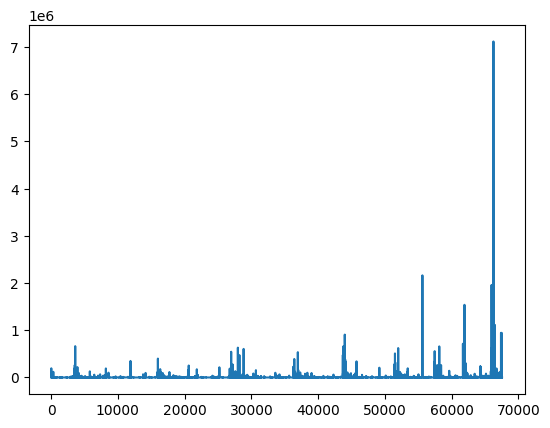

In [95]:
plt.plot(game_data['total_reviews'])

In [96]:
game_data['primary_genre'].unique()


array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Unknown Genre (0)',
       'Violent (73)', 'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)',
       'Game Development (60)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)',
       'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)',
       'Unknown Genre (21)'], dtype=object)

In [97]:
category_to_drop = ['Free to Play (37)', 'Early Access (70)', 'Unknown Genre (0)', 'Game Development (60)', 'Utilities (57)', 
                    'Audio Production (52)', 'Video Production (58)', 'Web Publishing (59)', 'Unknown Genre (34)', 'Unknown Genre (33)', 
                    'Unknown Genre (6)', 'Unknown Genre (21)']
rows_to_drop = game_data[game_data['primary_genre'].isin(category_to_drop)].index
game_data.drop(rows_to_drop, inplace=True)

In [98]:
category = game_data['primary_genre'].unique()
category

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Simulation (28)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Violent (73)',
       'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)'],
      dtype=object)

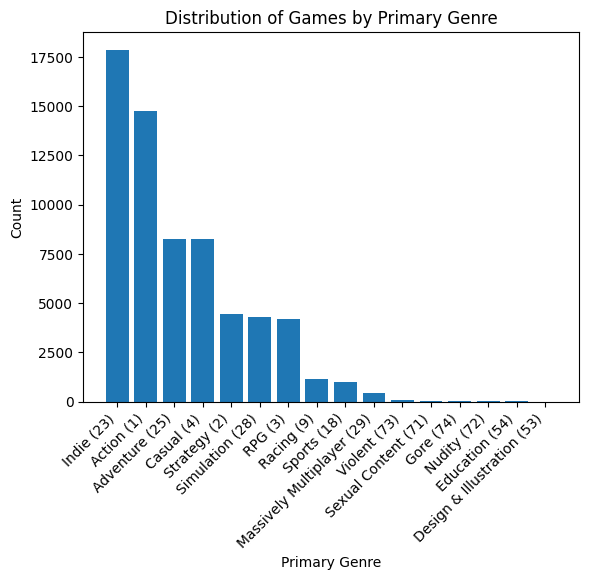

In [99]:
genre_counts = game_data['primary_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts)
plt.xlabel("Primary Genre")
plt.ylabel("Count")
plt.title('Distribution of Games by Primary Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

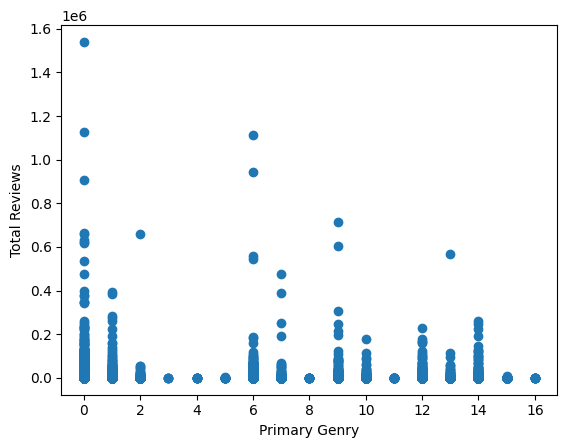

In [100]:
label_encoder = LabelEncoder()
game_data['primary_genre_encoded'] = label_encoder.fit_transform(game_data['primary_genre'])

plt.scatter(game_data['primary_genre_encoded'], game_data['total_reviews'])
plt.xlabel('Primary Genry')
plt.ylabel('Total Reviews')
plt.show()

In [101]:
game_data

,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,primary_genre_encoded
0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,0
1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,0
2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,2
3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,6
4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67564,Earth 2160,/app/1900/,2006-04-01,9960,878,375,1253,67.73,Strategy (2),Strategy (2),Topware Interactive,Reality Pump Studios,Engine.FNA; Engine.XNA; SDK.OpenAL,2019-12-23,70.0,13,17,9960,2018-04-12,14
67565,RoboBlitz,/app/4300/,2006-11-07,7,57,20,77,67.55,Action (1),"Action (1), Indie (23)",Naked Sky Entertainment,Naked Sky Entertainment,Engine.Unreal; SDK.OpenAL; SDK.Vorbis,NaN,75.0,0,1,7,2014-04-27,0
67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),Strategy (2),Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01,14
67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),Strategy (2),Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01,14
